<a href="https://colab.research.google.com/github/dhaniishta/Clustering_Analysis/blob/main/Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_tn_pca = PCA(n_components=2).fit_transform(X_normalized)

In [11]:
def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies

In [13]:
results = {"Algorithm": [], "Preprocessing": [], "Clusters": [], "Silhouette": [], "Calinski": [], "Davies-Bouldin": []}

In [17]:
# K-Means Clustering
for X_data, preprocess in zip([X, X_normalized, X_pca, X_tn_pca], ["No Data Processing", "Normalized", "PCA", "T+N+PCA"]):
    for n_clusters in [3, 4, 5]:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_data)
        silhouette, calinski, davies = evaluate_clustering(X_data, kmeans.labels_)
        results["Algorithm"].append("K-Means")
        results["Preprocessing"].append(preprocess)
        results["Clusters"].append(n_clusters)
        results["Silhouette"].append(silhouette)
        results["Calinski"].append(calinski)
        results["Davies-Bouldin"].append(davies)

In [18]:
# Hierarchical Clustering
for X_data, preprocess in zip([X, X_normalized, X_pca, X_tn_pca], ["No Data Processing", "Normalized", "PCA", "T+N+PCA"]):
    linkage_matrix = linkage(X_data, method='ward')
    for n_clusters in [3, 4, 5]:
        labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
        silhouette, calinski, davies = evaluate_clustering(X_data, labels)
        results["Algorithm"].append("Hierarchical")
        results["Preprocessing"].append(preprocess)
        results["Clusters"].append(n_clusters)
        results["Silhouette"].append(silhouette)
        results["Calinski"].append(calinski)
        results["Davies-Bouldin"].append(davies)

In [19]:
# Mean-Shift Clustering
for X_data, preprocess in zip([X, X_normalized, X_pca, X_tn_pca], ["No Data Processing", "Normalized", "PCA", "T+N+PCA"]):
    bandwidth = estimate_bandwidth(X_data, quantile=0.2)
    meanshift = MeanShift(bandwidth=bandwidth).fit(X_data)
    labels = meanshift.labels_
    silhouette, calinski, davies = evaluate_clustering(X_data, labels)
    results["Algorithm"].append("Mean-Shift")
    results["Preprocessing"].append(preprocess)
    results["Clusters"].append(len(np.unique(labels)))
    results["Silhouette"].append(silhouette)
    results["Calinski"].append(calinski)
    results["Davies-Bouldin"].append(davies)

In [20]:
results_df = pd.DataFrame(results)

In [21]:
results_df.to_csv("clustering_results.csv", index=False)

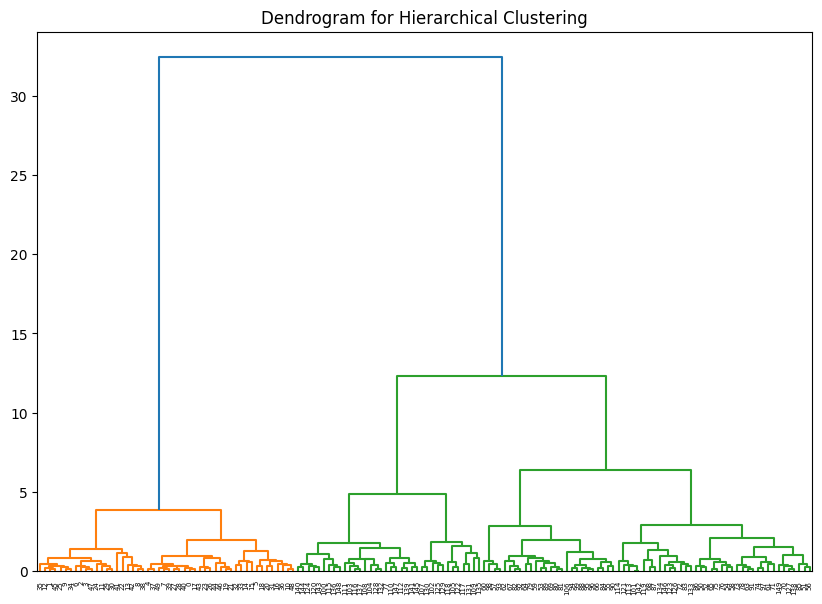

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(linkage(X, method='ward'))
plt.show()

In [23]:
print(results_df)

       Algorithm       Preprocessing  Clusters  Silhouette    Calinski  \
0        K-Means  No Data Processing         3    0.551192  561.593732   
1        K-Means  No Data Processing         4    0.497643  529.529095   
2        K-Means  No Data Processing         5    0.493080  495.243414   
3        K-Means          Normalized         3    0.479881  157.360153   
4        K-Means          Normalized         4    0.385045  206.680603   
5        K-Means          Normalized         5    0.345033  202.635850   
6        K-Means                 PCA         3    0.597676  693.708433   
7        K-Means                 PCA         4    0.557741  719.123544   
8        K-Means                 PCA         5    0.510041  642.060666   
9        K-Means             T+N+PCA         3    0.522791  180.975460   
10       K-Means             T+N+PCA         4    0.445187  263.884045   
11       K-Means             T+N+PCA         5    0.411085  278.451395   
12  Hierarchical  No Data Processing  